In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os
import numpy as np

In [10]:
# Import results
f_path = "./results_10_nodes/"
files = [r for r in os.listdir(f_path) if ".csv" in r]
r_concat = pd.concat([pd.read_csv(f_path + f) for f in files])

# Debug
assert(len(r_concat) == len(pd.read_csv(f_path + files[0])) * len(files))

# Compute accuracy 
acc_noisy_bn = sum(r_concat["bn_mpes"] == r_concat["bn_noisy_mpes"]) / len(r_concat)
acc_cn = sum(r_concat["bn_mpes"] == r_concat["cn_mpes"]) / len(r_concat)

print(f"Accuracy noisy BN: {acc_noisy_bn:.3f}")
print(f"Accuracy CN: {acc_cn:.3f}", end="\n\n")

print(f"CN certainty: {sum(r_concat['cn_probs'] > 0.5) / len(r_concat):.3f}/1")

Accuracy noisy BN: 0.992
Accuracy CN: 0.994

CN certainty: 1.000/1


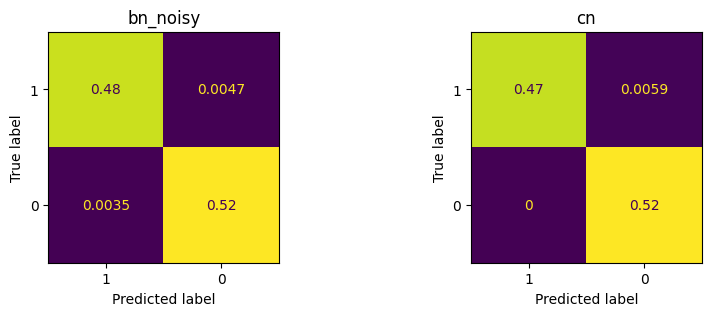

In [3]:
# Confusion matrix (C_{ij} means i, predicted as j)
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

nets = ["bn_noisy", "cn"]
for i in range(len(nets)):
    net = nets[i]
    cm = confusion_matrix(r_concat["bn_mpes"], r_concat[f"{net}_mpes"], labels=[1, 0], normalize="all")
    ConfusionMatrixDisplay(cm, display_labels=[1, 0]).plot(ax = axes[i], colorbar=False)
    axes[i].set_title(net)


In [ ]:
# ROC curve
# TODO